# SPICED ACADEMY // WEEK 1 // DEMOGRAPHIC VISUALIZATION
By: **Brunno Gorgulho Soares**

Data: Gapminder

---

# 0. Setup

In [130]:
''' Data manipulation '''
import pandas as pd
import numpy as np
import math

''' Visualization '''
import matplotlib.pyplot as plt
import seaborn as sns

''' GIF generation '''
import imageio

---

# 1. Define Business Goal

Visually identify if increased internet use has led to a decrease in fertility rate, presumably through preference for internet entertainment over having children. Method: visually inspecting number of internet users against fertility rate by country and over time. The result is a GIF, where each frame is one year. 

---

# 2. Getting data

In [131]:
''' Focus data '''
data_cont = pd.read_csv("data/continents.csv", sep = ';')
data_fert = pd.read_csv("data/gapminder_total_fertility.csv")
data_pop = pd.read_excel("data/gapminder_population.xlsx")
data_internet = pd.read_csv('data/net_users_num.csv')

---

# 3. Exploring Data

## 3.1 Continents table

In [132]:
''' Continents data is clean '''

print(data_cont.columns)
data_cont['continent'].unique()
data_cont['country'].unique()
data_cont['country'].count()
data_cont.isna().sum() # no na's

Index(['continent', 'country'], dtype='object')


continent    0
country      0
dtype: int64

In [133]:
''' Number of countries considered by continent -- obs. NA includes small islands '''

data_cont.groupby('continent').count()

,country
continent,
Africa,54
Asia,44
Australia and Oceania,14
Europe,47
North America,23
South America,12


## 3.2 Fertility table

In [134]:
''' Fertility data is in wide format '''

print(data_fert.columns)


Index(['Total fertility rate', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=217)


In [135]:
''' There is missing data to correct '''

data_fert.isna().sum().max() # missing data must be corrected, column max # of na's is 61

61

In [136]:
''' Fertility data is available for 260 countries -- obs. includes old country names '''

data_fert['Total fertility rate'].unique().shape
data_fert['Total fertility rate'].unique()

array(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Christmas Island', 'Cocos Island', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cook Is', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Czechoslovakia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Germany', 'Ecuador', 'Egypt',

In [137]:
''' 175 of the countries in the fertility rate table are also found in the contintents table '''

counter = []
for i in range(len(data_fert['Total fertility rate'])):
    if data_fert['Total fertility rate'][i] in list(data_cont['country']):
        counter.append(1)
sum(counter)

175

array([[<AxesSubplot:title={'center':'2015'}>]], dtype=object)

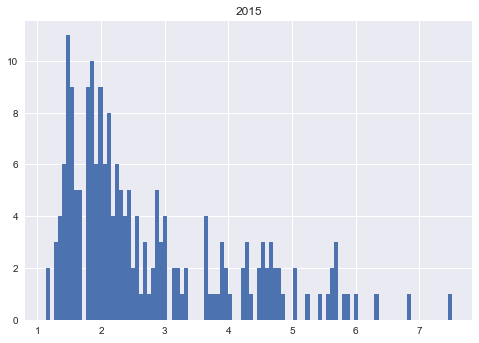

In [138]:
''' Positively skewed fertility distribution '''

data_fert_2015 = data_fert[['Total fertility rate','2015']].dropna()
data_fert_2015.hist(bins=100)


In [139]:
''' Minimum fertility rate in 2015 is 1.13 (Afghanistan), and highest 7.51 (Zimbabwe) '''

print(data_fert_2015.min(), data_fert_2015.max())

Total fertility rate    Afghanistan
2015                           1.13
dtype: object Total fertility rate    Zimbabwe
2015                        7.51
dtype: object


In [140]:
''' 77 countries had fertility rate below 2 in 2015, indicating population decrease '''

data_fert_2015[data_fert_2015['2015'] < 2].count()

Total fertility rate    77
2015                    77
dtype: int64

## 3.3 Populations table

In [157]:
data_pop.shape

(275, 82)

In [160]:
''' Drop columns without information '''

data_pop = data_pop[data_pop.columns.drop(list(data_pop.filter(regex='Unnamed:')))]

In [161]:
''' Missing data must be corrected, column max # of na's is 46, which means all values are missing '''

data_pop.isna().sum().max() 

46

In [ ]:
''' 176 of the countries in the life expectancy table also in populations table '''

counter = []
for i, country in enumerate(data_pop['Total population']):
    if country in list(data_cont['country']):
        counter.append(1)
sum(counter)

,Total population,2015
44,China,1.376049e+09
101,India,1.311051e+09


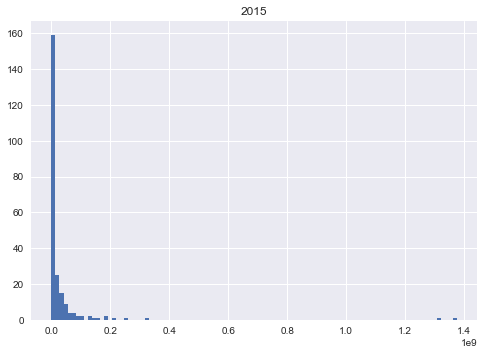

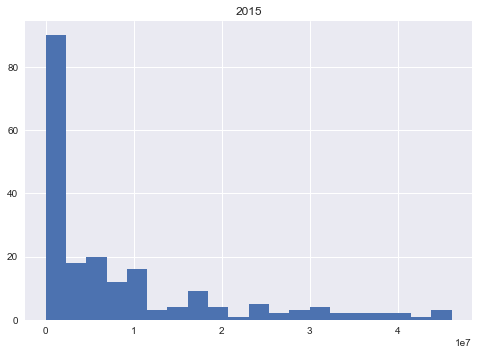

In [142]:
''' Identifying outliers -- obs. China and India are outliers in population and distort visualizations '''

data_pop_2015 = data_pop[['Total population', 2015]].dropna()
data_pop_2015.hist(bins=100)
q3 = data_pop_2015.quantile(0.75)
q1 = data_pop_2015.quantile(0.25)
outl_thres = int(q3 + 1.5 * (q3 - q1))

data_pop_2015_no_outl = data_pop_2015[data_pop_2015[2015]<outl_thres]
data_pop_2015_no_outl.hist(bins=20)

data_pop_2015[data_pop_2015[2015]>1000000000] # China and India are clear outliers

## 3.4 Internet Users table

In [156]:
''' At least 34 rows with na's '''

data_internet.isna().sum().max() # remove na's, max 34
data_internet

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0,0,0,0,0,0,NaN,NaN,NaN,...,1.17M,1.51M,1.7M,1.9M,2.34M,2.84M,3.96M,4.9M,5.02M,5.14M
1,Angola,0,0,0,0,0,0,112,844,2830,...,654k,751k,1.63M,2.32M,5.77M,3.46M,3.75M,4.28M,4.42M,4.56M
2,Albania,0,0,0,0,0,348,998,1510,2020,...,1.33M,1.44M,1.59M,1.66M,1.74M,1.83M,1.92M,2.07M,2.07M,2.01M
3,Andorra,0,0,0,0,0,0,983,1960,4420,...,68.4k,67.8k,71.2k,75.9k,76k,75.6k,75.7k,70.5k,70.5k,70.6k
4,United Arab Emirates,0,0,0,0,0,2490,9530,88k,194k,...,5.81M,6.98M,7.77M,8.09M,8.33M,8.38M,8.48M,9M,9.48M,9.69M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Samoa,0,0,0,0,0,0,NaN,300,398,...,13k,20.6k,24.4k,29.2k,40.8k,49.2k,57.2k,65.7k,65.9k,66.2k
192,Yemen,0,0,0,0,0,0,96,2400,3840,...,2.86M,3.55M,4.27M,5.03M,5.82M,6.38M,6.68M,7.44M,7.61M,7.79M
193,South Africa,0,5010,15k,45.1k,100k,280k,356k,702k,1.27M,...,12.3M,17.7M,21.7M,25M,26.7M,28.8M,30.4M,32M,32.5M,32.9M
194,Zambia,0,0,0,0,601,799,847,895,2980,...,1.36M,1.61M,1.95M,2.3M,2.93M,3.33M,4.17M,4.69M,2.48M,2.55M


---

# 4. Data Cleaning

In [144]:
''' Fertility data cleaning '''

df_cont = data_cont

df_fert = pd.melt(data_fert,id_vars = 'Total fertility rate').dropna() # wide to long format
df_fert.columns = ['country', 'year', 'fertility_rate'] # renaming columns
df_fert = df_fert.astype({'year': 'int', 'fertility_rate': 'float'}) # fixing variable types

In [145]:
''' Population data cleaning '''

df_pop = pd.melt(data_pop, id_vars = 'Total population').dropna() # dropping rows with nan
df_pop.columns = ['country', 'year', 'total_population'] # renaming columns
df_pop = df_pop.astype({'year': 'int', 'total_population': 'int'}) # fixing variable types

In [146]:
''' Internet data cleaning '''

df_internet = data_internet.melt(id_vars='country') # wide to long format
df_internet.columns = ['country', 'year', 'internet_users'] # renaming columns

# converting human legible number (e.g. 10M) format to computer format (e.g. 10000000)
df_internet['short_number'] = df_internet['internet_users'].apply(lambda x: 1000000 if str(x)[-1] == 'M' else (1000 if str(x)[-1] == 'k' else 1)) 
df_internet['internet_users'] = df_internet['internet_users'].str.replace('M', '')
df_internet['internet_users'] = df_internet['internet_users'].str.replace('k', '').astype(float)
df_internet['internet_users'] = df_internet['internet_users'] * df_internet['short_number']
df_internet.drop('short_number', inplace=True, axis=1)

df_internet = df_internet.astype({'country':'str', 'year':'int'}) # fixing variable types

df_internet['internet_users'].replace(0.0,np.nan,inplace=True)


In [147]:
''' Creating a master table with data for: Population, Fertility, Life Expectancy, Continent Name, and Internet Users '''

df_merge = df_pop.merge(df_fert, how='left', on=['country','year']).merge(df_lifeexp, how='left', on=['country','year']).merge(df_cont, how='left', on='country').merge(df_internet, how='left', on=['country','year'])


---

# 5. Data Engineering

In [148]:
''' Extracting log of internet users, to remove exponential pattern '''

df_merge['internet_users_log'] = np.log2(df_merge['internet_users'])

''' 
I take the log of internet users because this number appears to grow exponentially within the analysis time frame.
To linearize the relationship (constant speed in GIF) I use log with base 2 which appears to work best.
'''

---

# 6. Exploring Variable Relationships

## 6.1 Visualizing all possible relationships

In [149]:
''' Excluding China and India for being outliers in population size '''

df_plot = df_merge[(df_merge['year']==2015) & (~df_merge['country'].isin(['China', 'India']))]

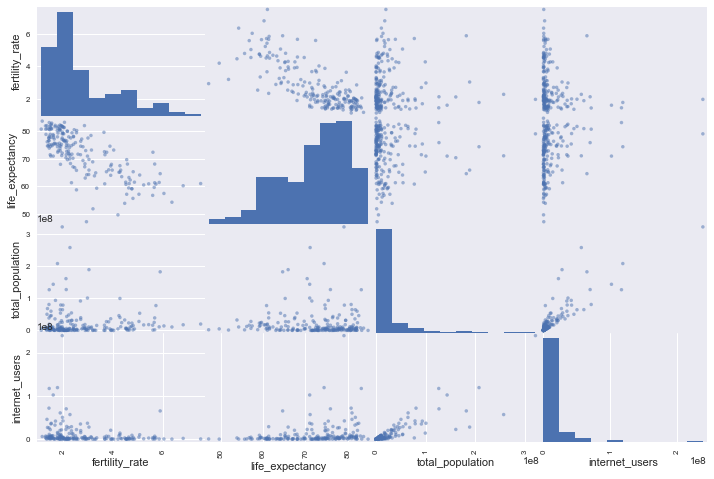

In [150]:
''' No clear relationship between internet users and fertility rate when not factoring in time component '''

pd.plotting.scatter_matrix(df_plot[['fertility_rate', 'life_expectancy', 'total_population','internet_users']], figsize=(12,8))
despine=True # cleaning graph display

## 6.2 Fertility Rate over time

In [151]:
''' Fertility rate has dropped between 1960 and 2015 for most countries '''

df_exper_1960 = df_merge[df_merge['year']==1960][['country','fertility_rate']]
df_exper_1960.rename(columns={'country':'country', 'fertility_rate': 'fert_rate_1960'}, inplace=True)

df_exper_2015 = df_merge[df_merge['year']==2015][['country','fertility_rate']]
df_exper_2015.rename(columns={'country':'country', 'fertility_rate': 'fert_rate_2015'}, inplace=True)

df_exper = df_exper_1960.merge(df_exper_2015)
df_exper.set_index('country')
df_exper['fert_delta'] = df_exper['fert_rate_2015'] - df_exper['fert_rate_1960']
df_exper = df_exper.sort_values('fert_delta')
df_exper.dropna().tail(30)


,country,fert_rate_1960,fert_rate_2015,fert_delta
188,Somalia,7.25,6.36,-0.89
168,Romania,2.32,1.45,-0.87
31,Burkina Faso,6.29,5.43,-0.86
61,Equatorial Guinea,5.51,4.65,-0.86
216,Uruguay,2.88,2.03,-0.85
100,Italy,2.37,1.52,-0.85
68,Finland,2.71,1.86,-0.85
50,Croatia,2.33,1.52,-0.81
214,United Kingdom,2.69,1.89,-0.80
69,France,2.77,1.98,-0.79


---

# 7. Deployment (GIF Scatter)

In [152]:
for i in df_merge['continent'].unique():
    print(i)

Asia
Europe
Africa
nan
North America
South America
Australia and Oceania


In [153]:
''' Adding coloring to different continents '''

colors = {
    'Asia':'blue', 
    'Europe':'red', 
    'Africa':'yellow', 
    'North America':'green', 
    'South America':'purple',
    'Australia and Oceania':'black'
}

In [162]:
plt.style.use('seaborn')

x = 'internet_users_log'
y = 'fertility_rate'
z = 'total_population'
c = 'continent'

for year in range(1990, 2015+1):
    plt.axis((0,30,0,8))
    
    d = df_merge[df_merge['year']==year].dropna()

    plt.scatter(x=d[x], y=d[y], s=d[z]/5000000) # , c=d[c].replace(colors).values)
    
    plt.title(f'Preference of Couples in {year}', size=20)
    plt.xlabel('Log of Internet Users', size=15)
    plt.ylabel('Fertility Rate', size=15)
    # plt.legend('Continent', fontsize='x-large') # working to fix legend
    
    plt.savefig('data/lifeexp_'+str(year)+'.png', dpi=200)
    plt.close()

In [163]:
images =[]

for i in range(1990, 2015+1):
    filename = 'data/lifeexp_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=4)